# Exploratory Data Analysis (EDA)  

In this notebook, we load our pollen dataset (2D views generated from STL models) and analyze:  

- The number of models in the dataset  
- Visualization of randomly selected samples (left and right views, combined view)  
- Calculation of a simple disparity/depth map using OpenCV Stereo Block Matching  
- Visualization of a histogram of brightness values  

**Note:** The `PollenDataset` class is imported from a separate folder.

In [1]:
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from dotenv import load_dotenv

load_dotenv()

sys.path.append('..')
from data import PollenDataset

## Dataset-Instance

In [2]:
DATA_DIR = os.getenv("DATA_DIR_PATH")


dataset = PollenDataset(data_dir=DATA_DIR, return_3d=False)
print(f"Number of Pollen Grain Meshes present: {len(dataset)}")

Number of Pollen Grain Meshes present: 206


## Beispiel-Sample visualisieren

Wir wählen ein zufälliges Sample aus dem Dataset, zeigen die linke und rechte Ansicht einzeln an und kombinieren beide Bilder zu einer Gesamtansicht.

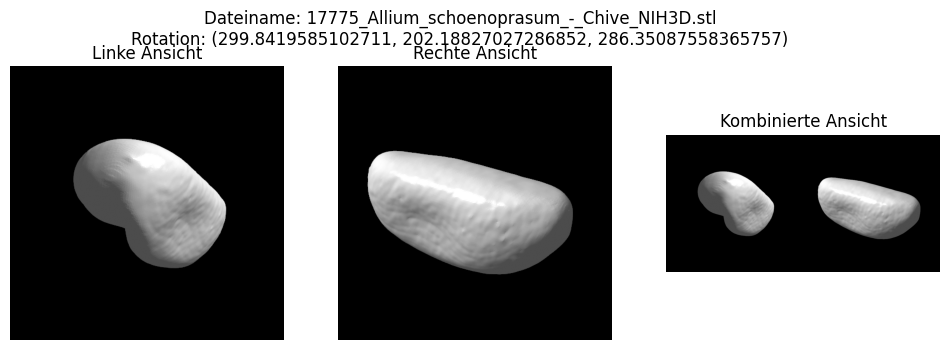

In [3]:
idx = random.randint(0, len(dataset) - 1)
sample = dataset[idx]
left = sample['left_view']
right = sample['right_view']
rotation = sample['rotation']
filename = sample['file_name']

combined = np.concatenate((left, right), axis=1)

# Plot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(left, cmap='gray')
plt.title("Linke Ansicht")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(right, cmap='gray')
plt.title("Rechte Ansicht")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(combined, cmap='gray')
plt.title("Kombinierte Ansicht")
plt.axis("off")
plt.suptitle(f"Dateiname: {filename}\nRotation: {rotation}")
plt.show()

## Berechnung einer Disparitäts-/Depth-Map (Proxy)

Mithilfe von OpenCV und StereoBM berechnen wir eine einfache Disparitätskarte aus den beiden Ansichten. Diese kann als grober Proxy für eine Depth Map genutzt werden – beachten, dass diese Methode voraussetzt, dass beide Bilder gut korrespondieren.

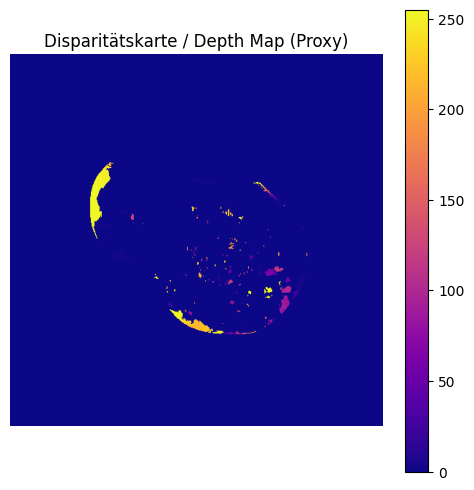

In [4]:
left_np = np.array(left)
right_np = np.array(right)

left_uint8 = cv2.normalize(left_np, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
right_uint8 = cv2.normalize(right_np, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


numDisparities = 64
blockSize = 15
stereo = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)

disparity = stereo.compute(left_uint8, right_uint8).astype(np.float32)

disp_norm = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disp_norm = np.uint8(disp_norm)

plt.figure(figsize=(6,6))
plt.imshow(disp_norm, cmap='plasma')
plt.title("Disparitätskarte / Depth Map (Proxy)")
plt.axis("off")
plt.colorbar()
plt.show()

## Histogramm der Helligkeitswerte der linken Ansicht

Ein Histogramm zeigt die Verteilung der Helligkeitswerte im Bild. Dies kann hilfreich sein, um Kontraste, Belichtung und mögliche Bildanomalien zu beurteilen.

In [5]:
plt.figure(figsize=(6,4))
plt.hist(left.ravel(), bins=50, color='gray', alpha=0.7)
plt.title("Histogramm der Helligkeitswerte (Linke Ansicht)")
plt.xlabel("Helligkeit")
plt.ylabel("Pixelanzahl")
plt.show()

AttributeError: 'Image' object has no attribute 'ravel'

<Figure size 600x400 with 0 Axes>